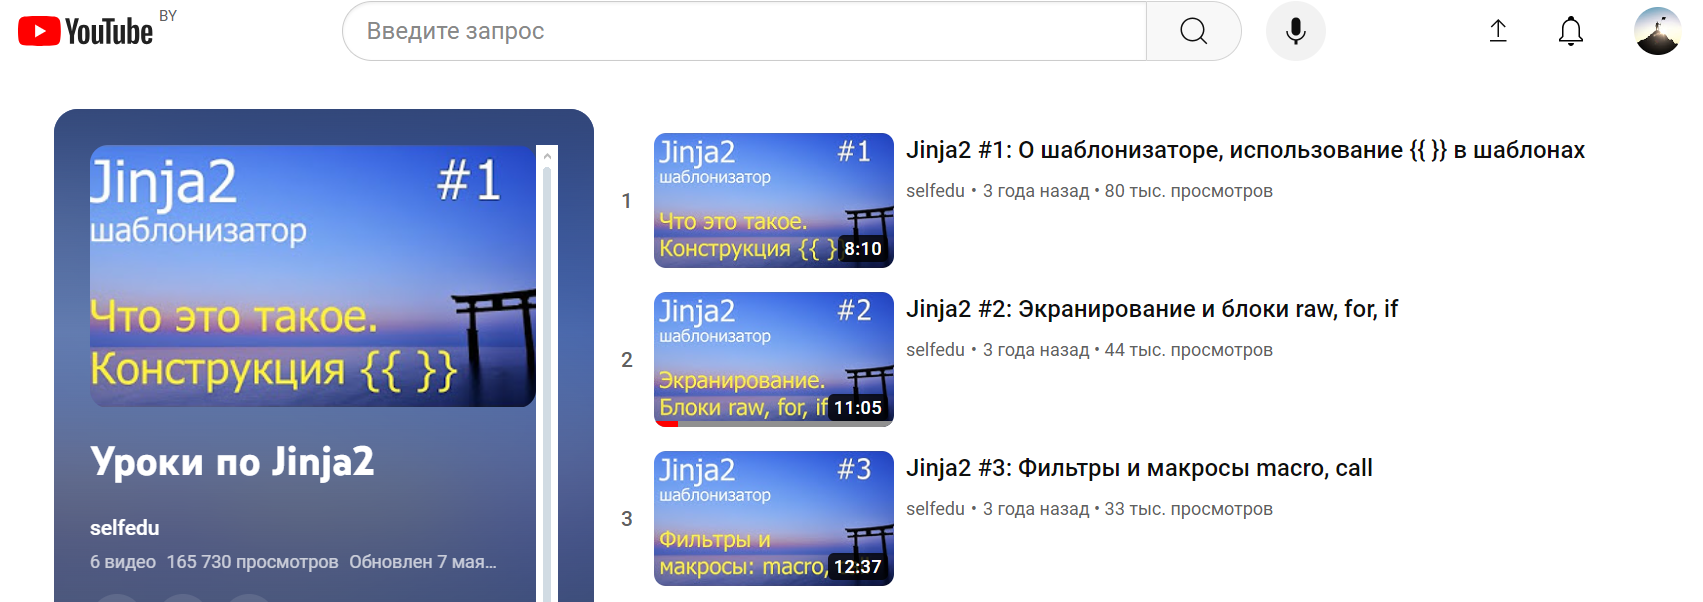

In [1]:
from jinja2 import Template

data = 'My name is {{ name }}'
tm = Template(data)
msg = tm.render(name='Sasha')
msg

'My name is Sasha'

### Внутри блока raw ничего не будет преобразовываться
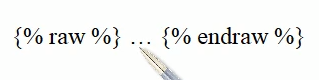

In [2]:
data = '{% raw %}My name is {{ name }}.{% endraw %}'
tm = Template(data)
msg = tm.render(name='Sasha')
msg

'My name is {{ name }}.'

При работе с текстовыми HTML-шаблонами часто возникает необходимость экранирования некоторых символов, которые браузерами воспринимаются как определение тегов. 

In [3]:
link = """Document <a link="#">link</a>"""

tm = Template('{{ link }}')
msg = tm.render(link=link)
print(msg)

tm = Template('{{ link | e}}')  # Escape character
msg = tm.render(link=link)
print(msg)

Document <a link="#">link</a>
Document &lt;a link=&#34;#&#34;&gt;link&lt;/a&gt;


**Jinja2** часто используется для создание шаблонов сайта

In [4]:
from markupsafe import escape

link = """Document <a link="#">link</a>"""
msg = escape(link)
print(msg)

Document &lt;a link=&#34;#&#34;&gt;link&lt;/a&gt;


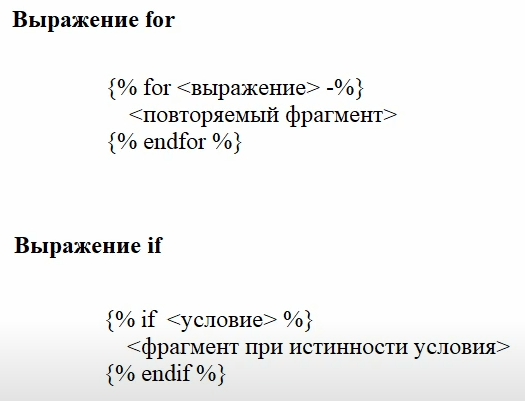

In [5]:
cities = {
    'Minsk': 'Минск',
    'Gomel': 'Гомель'
}

link = '''
{% for city in cities -%}
<p>{{ city }}</p>
{% endfor -%}
'''

tm = Template(link)
msg = tm.render(cities=cities)
print(msg)


<p>Minsk</p>
<p>Gomel</p>



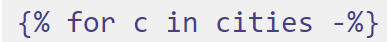
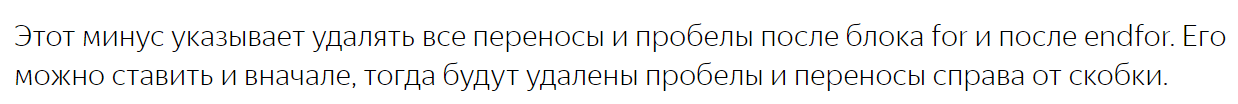

In [6]:
numbers = {1: 'one', 2: 'two', 3: 'three'}

link = """
{% for key, number in numbers.items() -%}
{% if key > 2 -%}
    <p>{{ number }}</p>
{% elif key == 2 -%}
    <p>{{ key }} - {{ number }}</p>
{% else -%}
    <p>{{ key }}</p>
{% endif -%}
{% endfor %}
"""

tm = Template(link)
msg = tm.render(numbers=numbers)
print(msg)


<p>1</p>
<p>2 - two</p>
<p>three</p>

